In [10]:
from pylatex import Document, Section, Subsection, Command, Subsubsection, Figure
from pylatex.utils import italic, NoEscape
from pylatex.base_classes import SpecialOptions

In [11]:
import matplotlib.pyplot as plt

In [12]:
geometry_options = {
    "head": "40pt",
    "top": "2cm",
    "bottom": "2cm",
    "left": "3cm",
    "right": "3cm",
    "includeheadfoot": True
}

In [13]:
doc = Document("EPD", geometry_options=geometry_options)
doc.__dict__

{'default_filepath': 'EPD',
 'documentclass': Command('documentclass', Arguments('article'), Options()),
 '_fontenc': 'T1',
 '_inputenc': 'utf8',
 '_lmodern': True,
 '_indent': True,
 '_microtype': False,
 'options': None,
 'arguments': None,
 'start_arguments': None,
 'data': [Command('normalsize', Arguments(), Options())],
 'real_data': [Command('normalsize', Arguments(), Options())],
 'packages': OrderedSet([Package(Arguments('fontenc'), Options('T1')), Package(Arguments('inputenc'), Options('utf8')), Package(Arguments('lmodern'), Options()), Package(Arguments('textcomp'), Options()), Package(Arguments('lastpage'), Options()), Package(Arguments('geometry'), Options()), Command('geometry', SpecialArguments(head='40pt', top='2cm', bottom='2cm', left='3cm', right='3cm', includeheadfoot=True), Options())]),
 '_latex_name': 'document',
 'variables': [],
 'preamble': [],
 'color': False,
 'meta_data': False}

In [14]:
class TestReport(Document):
    def __init__(self, scenario, **kwargs):
        self.geometry_options = kwargs.get("geometry_options") or {
            "head": "40pt",
            "top": "2cm",
            "bottom": "2cm",
            "left": "3cm",
            "right": "3cm",
            "includeheadfoot": True
        }
        super().__init__(geometry_options=geometry_options)
        self.scenario = scenario
        self.documentclass = Command('documentclass',
                                     arguments=['article'],
                                     options=['titlepage'])
        self.preamble.append(Command('title', 'Mission Analysis Report'))
        self.preamble.append(Command('date', NoEscape(r'\today')))
        self.append(NoEscape(r'\maketitle'))

        self.introduction_section = None
        self.gs_access_section = None
        self.eclipse_section = None
        self.sensor_coverage_section = None
        self.ground_track_section = None
        self.power_section = None
        self.lifetime_section = None

    def _create_introduction_section(self, data):
        self.introduction_section = Section(f"Introduction")

    def _create_gs_access_section(self, satellite, station, data):
        self.gs_access_section = Section(f"Access Report of {satellite} | {station}")

    def _create_eclipse_section(self, satellite, data):
        self.eclipse_section = Section(f"Eclipse Report of {satellite}")

    def _create_sensor_coverage_section(self, satellite, sensors, data):
        self.sensor_coverage_section = Section(f"Sensor Coverage Report of {satellite}")

    def _create_ground_track_section(self, satellite, data, start=None, end=None):
        self.ground_track_section = Section(f"Ground Track Report of {satellite}")

    def _create_power_section(self, satellite, data):
        self.power_section = Section(f"Power Report of {satellite}")

    def _create_lifetime_section(self, satellite, data):
        self.lifetime_section = Section(f"Lifetime Report of {satellite}")

    def _add_section(self, section):
        with self.create(section):
            self.append("Data")

    def _add_subsection(self, section, subsection):
        x = [0, 1, 2, 3, 4, 5, 6]
        y = [15, 2, 7, 1, 5, 6, 9]

        plt.plot(x, y)
        f = Figure(position='htbp')
        f.add_plot(width=NoEscape(r'0.5\textwidth'))
        f.add_caption('Test Figure.')
        subsection.append(f)
        section.append(subsection)

    def create_report(self):
        """Add a section, a subsection and some text to the document."""
        self._create_introduction_section("Data")
        self._create_gs_access_section("SeRANIS", "Neubiberg", "Data")
        self._create_eclipse_section("SeRANIS", "Data")
        self._create_sensor_coverage_section("SeRANIS", ["Ka Band"], "Data")
        self._create_ground_track_section("SeRANIS", "Data")
        self._create_power_section("SeRANIS", "Data")
        self._create_lifetime_section("SeRANIS", "Data")
        self._add_subsection(self.introduction_section, Subsection("Test1"))
        self._add_subsection(self.introduction_section, Subsection("Test2"))

        self._add_section(self.introduction_section)
        self._add_section(self.gs_access_section)
        self._add_section(self.eclipse_section)
        self._add_section(self.sensor_coverage_section)
        self._add_section(self.ground_track_section)
        self._add_section(self.power_section)
        self._add_section(self.lifetime_section)



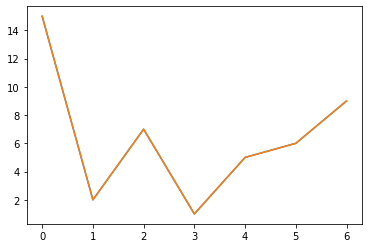

In [15]:
 doc = TestReport("Test_Scenario")
 doc.create_report()
 doc.generate_pdf("test_report", compiler="pdflatex")